In [661]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [662]:
image= cv2.imread('SpaceXmap.jpg')

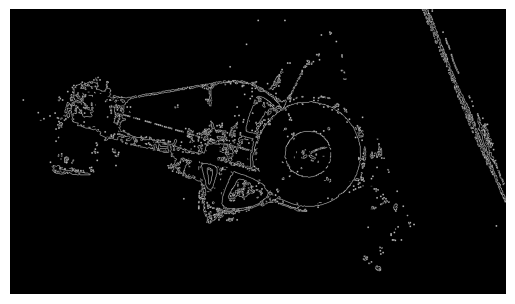

In [663]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
down = np.array([0, 0, 220])
tp = np.array([140, 160, 255]) 
mask = cv2.inRange(hsv, down, tp)
filtered_image = cv2.bitwise_and(rgb, rgb, mask=mask)
filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(filtered_image, 50, 70)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

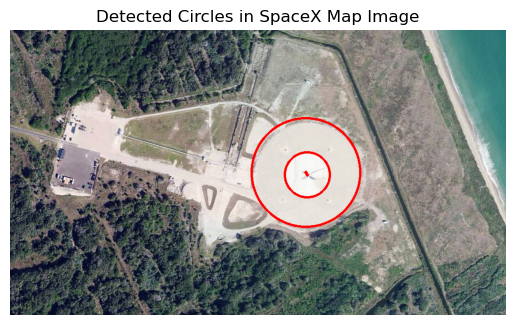

In [664]:
# outputimg, circles = find_hough_circles(image, edges, 50, 120, 1, 100, 0.41, True)

# circle = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 5, 800, param1=10, param2=120, minRadius=50, maxRadius=120)
circle1 = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT,2, 1, param1=60, param2=70, minRadius=45, maxRadius=70)
circle2 = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1.3, 1, param1=130, param2=75, minRadius=50, maxRadius=120)
circle1 = np.uint16(np.around(circle1))
circle2 = np.uint16(np.around(circle2))
resultimg = cv2.imread('SpaceXmap.jpg')
for i in circle1[0, :]:
    # Draw the outer circle
    cv2.circle(resultimg, (i[0], i[1]), i[2], (0, 0,255), 3)
    # Draw the center of the circle
    cv2.circle(resultimg, (i[0], i[1]), 2, (0, 0,255), 3)
for i in circle2[0, :]:
    # Draw the outer circle
    cv2.circle(resultimg, (i[0], i[1]), i[2], (0, 0, 255), 3)
    # Draw the center of the circle
    cv2.circle(resultimg, (i[0], i[1]), 2, (0,0, 255), 3)
outputimg = cv2.cvtColor(resultimg, cv2.COLOR_BGR2RGB)

# Assuming outputimg is the image with detected circles (in BGR format)
plt.imshow(outputimg)
plt.title("Detected Circles in SpaceX Map Image")
plt.axis('off')
plt.show()